# Toronto Real Estate Analysis

This tool scrapes data from condos.ca and presents some exploratory data analysis on the current Toronto Condo Real Estate Market.


This is for educational purposes only, and should not be used for financial advice.

# 1. Initiate Web Scraping

<b> 1. Import that packages needed for Exploratory Data Analysis and Web Scraping </B>

In [1]:
from bs4 import BeautifulSoup # For HTML parsing
from time import sleep # To prevent overwhelming the server between connections
import time
import pandas as pd # For converting results to a dataframe and bar chart plots
# For Visualizations
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

%matplotlib inline

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://condos.ca')

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 96.0.4664
[WDM] - Get LATEST driver version for 96.0.4664
[WDM] - Get LATEST driver version for 96.0.4664
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\perry\.wdm\drivers\chromedriver\win32\96.0.4664.45]


# 2. Scraping Current Listings by Region

In [3]:
#Scape Downtown Toronto Condos
dt_prices=[]
dt_location=[]
dt_sqft=[]
dt_bd=[]
dt_all=[]
dt_mtce=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=14&map_bounds=-79.42622740273723%2C43.631012253246524%2C-79.34335197801218%2C43.677188638832035&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(29):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        dt_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        dt_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        dt_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        dt_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        dt_all.append(everything)
    
    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        dt_mtce.append(everything)



In [4]:
dt_condos = pd.DataFrame({'Prices':dt_prices,
                         'Location':dt_location,
                         'Square Ft':dt_sqft,
                         'Bedrooms':dt_bd,
                         'Everything':dt_all,
                         'Maintenance Fee':dt_mtce,
                         'Region':'Downtown'})
print (dt_condos)

         Prices                    Location         Square Ft Bedrooms  \
0      $599,000       1107 - 17 Bathurst St      500-599 sqft      1BD   
1      $690,000     811 - 24 Wellesley St W  1,200-1,399 sqft      2+1   
2      $619,000          808 - 77 Shuter St      500-599 sqft      1+1   
3    $4,202,888         4904 - 1 Bloor St W  1,400-1,599 sqft      2+1   
4      $639,000               105 George St      500-599 sqft      1+1   
..          ...                         ...               ...      ...   
797    $899,900  2210 - 10 Queens Quay Walk  1,000-1,199 sqft      2BD   
798    $619,999     633 - 222 The Esplanade      800-899 sqft      2BD   
799    $619,999     633 - 222 The Esplanade      800-899 sqft      2BD   
800  $1,150,000    115 - 993 Queen Street W      900-999 sqft      1BD   
801    $899,999      1502 - 50 Power Street      800-899 sqft      2+1   

                            Everything                  Maintenance Fee  \
0          1BD1BA0 Parking500-599 sq

In [5]:
#Scape Scarborough Condos
sc_prices=[]
sc_location=[]
sc_sqft=[]
sc_bd=[]
sc_all=[]
sc_mtce=[]

def get_page(page):
    url= f'https://condos.ca/toronto/scarborough/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(5):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        sc_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        sc_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        sc_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        sc_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        sc_all.append(everything)

    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        sc_mtce.append(everything)

In [6]:
sc_condos = pd.DataFrame({'Prices':sc_prices,
                         'Location':sc_location,
                         'Square Ft':sc_sqft,
                         'Bedrooms':sc_bd,
                         'Everything':sc_all,
                          'Maintenance Fee':sc_mtce,
                         'Region':'Scarborough'})
print (sc_condos)

         Prices                      Location         Square Ft Bedrooms  \
0      $449,990          509 - 180 Markham Rd  1,400-1,599 sqft      3BD   
1      $659,000     312 - 3220 Sheppard Ave E      700-799 sqft      1+1   
2      $499,900         2606 - 190 Borough Dr      600-699 sqft      1+1   
3      $449,900         508 - 121 Trudelle St  1,200-1,399 sqft      2+1   
4      $489,000       1317 - 1346 Danforth Rd      600-699 sqft      1+1   
..          ...                           ...               ...      ...   
105    $599,000  1402 - 3151 Bridletowne Circ  1,400-1,599 sqft      2+1   
106    $469,000      1701 - 3050 Ellesmere Rd      800-899 sqft      1+1   
107    $544,800        1408 - 121 Trudelle St  1,200-1,399 sqft      2+1   
108    $669,000     423 - 3220 Sheppard Ave E      700-799 sqft      1+1   
109  $1,761,750        701 - 1316 Kingston Rd  1,200-1,399 sqft      2BD   

                            Everything                  Maintenance Fee  \
0      3BD2B

In [7]:
#Scape Etobicoke Condos
et_prices=[]
et_location=[]
et_sqft=[]
et_bd=[]
et_all=[]
et_mtce=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=16&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(7):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        et_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        et_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        et_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        et_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        et_all.append(everything)
    
    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        et_mtce.append(everything)

In [8]:
et_condos = pd.DataFrame({'Prices':et_prices,
                         'Location':et_location,
                         'Square Ft':et_sqft,
                         'Bedrooms':et_bd,
                         'Everything':et_all,
                          'Maintenance Fee':et_mtce,
                         'Region':'Etobicoke'})
print (et_condos)

         Prices                      Location         Square Ft Bedrooms  \
0      $548,888    301 - 1 Neighbourhood Lane      500-599 sqft      1BD   
1      $815,000              C6 - 296 Mill Rd  1,800-1,999 sqft      3BD   
2      $838,000        1707 - 90 Park Lawn Rd      800-899 sqft      2BD   
3      $589,900  107 - 225 Sherway Gardens Rd      600-699 sqft      1BD   
4      $529,000   1909 - 2285 Lake Shore Blvd      600-699 sqft      1BD   
..          ...                           ...               ...      ...   
191  $1,395,000           608 - 3085 Bloor St  1,200-1,399 sqft      2BD   
192    $799,990      320 - 20 Shore Breeze Dr      700-799 sqft      2BD   
193    $549,000          3531 - 5 Mabelle Ave      500-599 sqft      1BD   
194    $950,000              Peter & Adelaide      800-899 sqft      3BD   
195    $950,000              Peter & Adelaide      800-899 sqft      3BD   

                          Everything                  Maintenance Fee  \
0        1BD1B

In [9]:
#Scape North York Condos
ny_prices=[]
ny_location=[]
ny_sqft=[]
ny_bd=[]
ny_all=[]
ny_mtce=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=17&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(11):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        ny_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        ny_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        ny_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        ny_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        ny_all.append(everything)
        
    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        ny_mtce.append(everything)

In [10]:
ny_condos = pd.DataFrame({'Prices':ny_prices,
                         'Location':ny_location,
                         'Square Ft':ny_sqft,
                         'Bedrooms':ny_bd,
                         'Everything':ny_all,
                          'Maintenance Fee':ny_mtce,
                         'Region':'North York'})
print (ny_condos)

         Prices                      Location         Square Ft Bedrooms  \
0      $549,000  501 - 60 Pavane Linkway Lane  1,000-1,199 sqft      3BD   
1      $645,000      602 - 20 Forest Manor Rd      900-999 sqft      2BD   
2      $499,900           810 - 7 Concorde Pl      600-699 sqft      1BD   
3      $625,000     103 - 1060 Sheppard Ave W      600-699 sqft      1+1   
4      $850,000          1102 - 65 Skymark Dr  1,800-1,999 sqft      2BD   
..          ...                           ...               ...      ...   
372    $705,800      404 - 38 Forest Manor Rd      600-699 sqft      2BD   
373    $999,000     3008 - 70 Forest Manor Rd      900-999 sqft      2BD   
374    $799,000       1402 - 28 Hollywood Ave  1,200-1,399 sqft      2+1   
375    $648,900      217 - 36 Forest Manor Rd      600-699 sqft      1+1   
376  $5,688,000               309 - 1 Post Rd  4,000-4,249 sqft      3BD   

                            Everything                  Maintenance Fee  \
0      3BD2B

In [11]:
#Scape York Crosstown Condos
yc_prices=[]
yc_location=[]
yc_sqft=[]
yc_bd=[]
yc_all=[]
yc_mtce=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=18&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(2):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        yc_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        yc_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        yc_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        yc_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        yc_all.append(everything)
        
    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        yc_mtce.append(everything)

In [12]:
yc_condos = pd.DataFrame({'Prices':yc_prices,
                         'Location':yc_location,
                         'Square Ft':yc_sqft,
                         'Bedrooms':yc_bd,
                         'Everything':yc_all,
                          'Maintenance Fee':yc_mtce,
                         'Region':'York Crosstown'})
print (yc_condos)

      Prices                   Location         Square Ft Bedrooms  \
0   $785,000     1603 - 250 Scarlett Rd  1,000-1,199 sqft      3BD   
1   $575,000          1 Hickory Tree Rd  1,000-1,199 sqft      2+1   
2   $755,900       1009 - 75 Emmett Ave  1,600-1,799 sqft      3+1   
3   $449,900        704 - 1600 Keele St      600-699 sqft      1+1   
4   $399,900       1508 - 85 Emmett Ave      900-999 sqft      1+1   
5   $729,000      412 - 260 Scarlett Rd  1,000-1,199 sqft      2BD   
6   $399,900      #508 - 2464 Weston Rd        0-499 sqft      Stu   
7   $599,900  606 - 2088 Lawrence Ave W      900-999 sqft      2+1   
8   $445,000        708 - 1600 Keele St      500-599 sqft      1BD   
9   $564,900   1008 - 1 Hickory Tree Rd  1,200-1,399 sqft      2+1   
10  $639,000        212 - 75 Emmett Ave  1,200-1,399 sqft      2+1   
11  $575,000    702 - 3 Hickory Tree Rd  1,000-1,199 sqft      2BD   
12  $469,900   1607 - 3 Hickory Tree Rd      700-799 sqft      1+1   
13  $599,900    908 

In [13]:
#Scape West End Condos
we_prices=[]
we_location=[]
we_sqft=[]
we_bd=[]
we_all=[]
we_mtce=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&sublocality_id=19&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(5):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        we_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        we_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        we_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        we_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        we_all.append(everything)
        
    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        we_mtce.append(everything)

In [14]:
we_condos = pd.DataFrame({'Prices':we_prices,
                         'Location':we_location,
                         'Square Ft':we_sqft,
                         'Bedrooms':we_bd,
                         'Everything':we_all,
                          'Maintenance Fee':we_mtce,
                         'Region':'West End'})
print (we_condos)

        Prices                      Location         Square Ft Bedrooms  \
0     $899,000     604 - 69 Lynn Williams St      900-999 sqft      2BD   
1     $599,900        1418 - 60 Heintzman St      900-999 sqft      2BD   
2     $899,900  1109 - 19 Western Battery Rd      700-799 sqft      2+1   
3     $699,900           103 - 35 Wabash Ave      600-699 sqft      1+1   
4     $579,900         212 - 1369 Bloor St W      600-699 sqft      1+1   
..         ...                           ...               ...      ...   
67    $685,000       205 - 707 Dovercourt Rd      600-699 sqft      2BD   
68  $1,049,000       308 - 183 Dovercourt Rd      900-999 sqft      2BD   
69  $1,798,800        702 - 2639 Dundas St W  1,200-1,399 sqft      3BD   
70    $599,000      1307 - 816 Lansdowne Ave      600-699 sqft      1+1   
71  $1,795,000    438 - 437 Roncesvalles Ave  1,800-1,999 sqft      3+1   

                           Everything                  Maintenance Fee  \
0         2BD2BA1 Parking

In [15]:
#Scape East End Condos
ee_prices=[]
ee_location=[]
ee_sqft=[]
ee_bd=[]
ee_all=[]
ee_mtce=[]

def get_page(page):
    url= f'https://condos.ca/toronto/east-end/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&tab=listings&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(3):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        ee_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        ee_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        ee_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        ee_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        ee_all.append(everything)
        
    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        ee_mtce.append(everything)
    

In [16]:
ee_condos = pd.DataFrame({'Prices':ee_prices,
                         'Location':ee_location,
                         'Square Ft':ee_sqft,
                         'Bedrooms':ee_bd,
                         'Everything':ee_all,
                          'Maintenance Fee':ee_mtce,
                         'Region':'East End'})
print (ee_condos)

        Prices                 Location         Square Ft Bedrooms  \
0   $1,175,000    517 - 1863 Queen St E  1,000-1,199 sqft      2BD   
1     $759,900     631 - 30 Baseball Pl      600-699 sqft      2BD   
2     $499,900    302 - 1630 Queen St E      600-699 sqft      1BD   
3     $499,000     433 - 88 Colgate Ave        0-499 sqft      1BD   
4     $549,999   214 - 90 Broadview Ave        0-499 sqft      1BD   
5     $699,000        619 - 8 Trent Ave      800-899 sqft      2+1   
6     $962,000    PH701 - 246 Logan Ave      900-999 sqft      2+1   
7     $698,888      402 - 246 Logan Ave      500-599 sqft      1BD   
8     $699,000    401 - 1733 Queen St E      700-799 sqft      1BD   
9   $1,879,000     109 - 326 Carlaw Ave  2,000-2,249 sqft      3BD   
10    $939,900      503 - 365 Beech Ave      900-999 sqft      3BD   
11    $915,000    403 - 1863 Queen St E      900-999 sqft      2BD   
12    $899,000     125 - 201 Carlaw Ave  1,000-1,199 sqft      2BD   
13    $649,000     4

In [17]:
#Scape Midtown Condos
mt_prices=[]
mt_location=[]
mt_sqft=[]
mt_bd=[]
mt_all = []
mt_mtce=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&tab=listings&sublocality_id=21&map_bounds=-79.46598302581937%2C43.670349663837044%2C-79.34751082202625%2C43.73630566091123&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(7):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        mt_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        mt_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        mt_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        mt_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        mt_all.append(everything)
        
    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        mt_mtce.append(everything)

In [18]:
mt_condos = pd.DataFrame({'Prices':mt_prices,
                         'Location':mt_location,
                         'Square Ft':mt_sqft,
                         'Bedrooms':mt_bd,
                         'Everything':mt_all,
                          'Maintenance Fee':mt_mtce,
                         'Region':'Midtown/Central'})
print (mt_condos)

         Prices                   Location         Square Ft Bedrooms  \
0      $987,000       303 - 388 Bloor St E  1,200-1,399 sqft      2BD   
1      $719,000       2604 - 2221 Yonge St      500-599 sqft      1BD   
2    $1,165,000     201 - 1 Forest Hill Rd      800-899 sqft      1BD   
3    $1,198,000    714 - 70 Roehampton Ave  1,000-1,199 sqft      2BD   
4    $1,190,000   105 - 235 St Clair Ave W  1,000-1,199 sqft      2BD   
..          ...                        ...               ...      ...   
128    $899,900       807 - 360 Bloor St E  1,400-1,599 sqft      2+1   
129  $1,220,000       210 - 360 Bloor St E  1,400-1,599 sqft      2BD   
130  $4,500,000   PH15 - 70 Roehampton Ave  2,500-2,749 sqft      2BD   
131    $725,000  2114 - 101 Erskine Avenue      600-699 sqft      1+1   
132    $725,000  2114 - 101 Erskine Avenue      600-699 sqft      1+1   

                            Everything                  Maintenance Fee  \
0      2BD2BA1 Parking1,200-1,399 sqft    Maint.

In [19]:
#Scape East York Condos
ey_prices=[]
ey_location=[]
ey_sqft=[]
ey_bd=[]
ey_all=[]
ey_mtce=[]

def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?mode=Sale&size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&sale_price_range=200000%2C999999999&tab=listings&sublocality_id=22&map_bounds=-79.46598302581937%2C43.670349663837044%2C-79.34751082202625%2C43.73630566091123&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(7):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 dHPUdq'):
        ey_prices.append(tag.get_text())


    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        ey_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        ey_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        ey_bd.append(bedrooms)
    
    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        ey_all.append(everything)
        
    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        ey_mtce.append(everything)

In [20]:
ey_condos = pd.DataFrame({'Prices':ey_prices,
                         'Location':ey_location,
                         'Square Ft':ey_sqft,
                         'Bedrooms':ey_bd,
                         'Everything':ey_all,
                          'Maintenance Fee':ey_mtce,
                         'Region':'East York'})
print (ey_condos)

       Prices                   Location         Square Ft Bedrooms  \
0    $775,000   1807 - 980 Broadview Ave  1,000-1,199 sqft      2BD   
1  $1,176,900    402 - 800 Broadview Ave  1,000-1,199 sqft      2+1   
2  $1,680,000  2301 - 1048 Broadview Ave  1,800-1,999 sqft      2+1   
3    $524,900      511 - 21 Overlea Blvd      700-799 sqft      2BD   
4  $1,717,200       202 - 3 Southvale Dr  1,400-1,599 sqft      3BD   
5  $1,394,800       604 - 3 Southvale Dr  1,000-1,199 sqft      2BD   
6  $1,804,000      PH02 - 3 Southvale Dr  1,400-1,599 sqft      3BD   
7    $609,900     302 - 1387 Bayview Ave  1,000-1,199 sqft      2BD   

                          Everything                  Maintenance Fee  \
0    2BD2BA1 Parking1,000-1,199 sqft  Maint. Fee $1,018MLS#: E5453041   
1  2+1BD2BA0 Parking1,000-1,199 sqft    Maint. Fee $453MLS#: E5448007   
2  2+1BD3BA1 Parking1,800-1,999 sqft  Maint. Fee $1,367MLS#: E5407176   
3        2BD1BA1 Parking700-799 sqft    Maint. Fee $734MLS#: C539918

# 3. Data Cleaning

In [21]:
#To combine all the condos by region
frames = [dt_condos,
         sc_condos,
         et_condos,
         ny_condos,
         yc_condos,
         we_condos,
         ee_condos,
         mt_condos,
         ey_condos,]

df_condos = pd.concat(frames,axis=0,sort=True)
print (df_condos.head())

#We can see that the scraped data is not clean. Lots of merged data and prices in text format.

  Bedrooms                         Everything                 Location  \
0      1BD        1BD1BA0 Parking500-599 sqft    1107 - 17 Bathurst St   
1      2+1  2+1BD2BA1 Parking1,200-1,399 sqft  811 - 24 Wellesley St W   
2      1+1      1+1BD1BA0 Parking500-599 sqft       808 - 77 Shuter St   
3      2+1  2+1BD2BA0 Parking1,400-1,599 sqft      4904 - 1 Bloor St W   
4      1+1      1+1BD1BA0 Parking500-599 sqft            105 George St   

                 Maintenance Fee      Prices    Region         Square Ft  
0  Maint. Fee $294MLS#: C5454072    $599,000  Downtown      500-599 sqft  
1  Maint. Fee $995MLS#: C5453998    $690,000  Downtown  1,200-1,399 sqft  
2  Maint. Fee $401MLS#: C5453984    $619,000  Downtown      500-599 sqft  
3                 MLS#: C5453982  $4,202,888  Downtown  1,400-1,599 sqft  
4  Maint. Fee $478MLS#: C5453980    $639,000  Downtown      500-599 sqft  


In [22]:
#To clean up the Everything Column in order to pull out the number of Parking
df_condos[['A','B']] = df_condos['Everything'].str.split(' ',1, expand=True)
df_condos['Parking'] = df_condos['A'].str.strip().str[-1]
df_condos = df_condos.drop(columns = ['A','B'])

In [23]:
#To clean up the Pricing column
df_condos['Prices'] = df_condos['Prices'].str.replace('$','')
df_condos['Prices'] = df_condos['Prices'].str.replace(',','')
df_condos['Prices'] = df_condos['Prices'].astype(int)

In [24]:
#To clean up the sq ft column
df_condos['Square Ft'] = df_condos['Square Ft'].str.replace('sqft','')

#Remove the dash and split the min and max into two columns.
df_condos[['Min Sq Ft','Max Sq Ft']] = df_condos['Square Ft'].str.split('-',1, expand=True)

In [25]:
#Clean up the Min Sq Ft column
df_condos['Min Sq Ft'] = df_condos['Min Sq Ft'].str.replace(',','')

In [26]:
#Clean up the commas in the Max column
df_condos['Max Sq Ft'] = df_condos['Max Sq Ft'].str.replace(',','')

In [27]:
#Convert the Min Column into integers
df_condos['Min Sq Ft'] = df_condos['Min Sq Ft'].astype(int)

In [28]:
#Convert the Max column into integers
df_condos['Max Sq Ft'] = df_condos['Max Sq Ft'].fillna(0)
df_condos['Max Sq Ft'] = df_condos['Max Sq Ft'].astype(int)

In [29]:
df_condos

#The Dataset is now more clean, however, when calculating the "Average Sq Ft", 0 values in columns my skew data

,Bedrooms,Everything,Location,Maintenance Fee,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft
0,1BD,1BD1BA0 Parking500-599 sqft,1107 - 17 Bathurst St,Maint. Fee $294MLS#: C5454072,599000,Downtown,500-599,0,500,599
1,2+1,"2+1BD2BA1 Parking1,200-1,399 sqft",811 - 24 Wellesley St W,Maint. Fee $995MLS#: C5453998,690000,Downtown,"1,200-1,399",1,1200,1399
2,1+1,1+1BD1BA0 Parking500-599 sqft,808 - 77 Shuter St,Maint. Fee $401MLS#: C5453984,619000,Downtown,500-599,0,500,599
3,2+1,"2+1BD2BA0 Parking1,400-1,599 sqft",4904 - 1 Bloor St W,MLS#: C5453982,4202888,Downtown,"1,400-1,599",0,1400,1599
4,1+1,1+1BD1BA0 Parking500-599 sqft,105 George St,Maint. Fee $478MLS#: C5453980,639000,Downtown,500-599,0,500,599
...,...,...,...,...,...,...,...,...,...,...
3,2BD,2BD1BA1 Parking700-799 sqft,511 - 21 Overlea Blvd,Maint. Fee $734MLS#: C5399186,524900,East York,700-799,1,700,799
4,3BD,"3BD3BA1 Parking1,400-1,599 sqft",202 - 3 Southvale Dr,"Maint. Fee $1,131MLS#: C5354509",1717200,East York,"1,400-1,599",1,1400,1599
5,2BD,"2BD2BA1 Parking1,000-1,199 sqft",604 - 3 Southvale Dr,Maint. Fee $899MLS#: C5352888,1394800,East York,"1,000-1,199",1,1000,1199
6,3BD,"3BD2BA1 Parking1,400-1,599 sqft",PH02 - 3 Southvale Dr,"Maint. Fee $1,102MLS#: C5351473",1804000,East York,"1,400-1,599",1,1400,1599


In [30]:
#Check if there are any 0 values in Min and Max Sq Ft columns
sq_ft_zero = df_condos['Min Sq Ft'] == 0
b = df_condos[sq_ft_zero]
b

,Bedrooms,Everything,Location,Maintenance Fee,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft
25,Stu,Studio1BA0 Parking0-499 sqft,1802 - 7 Grenville St,Maint. Fee $251MLS#: C5454014,579000,Downtown,0-499,0,0,499
35,1BD,1BD1BA0 Parking0-499 sqft,1106 - 458 Richmond St W,Maint. Fee $353MLS#: C5452775,589900,Downtown,0-499,0,0,499
37,1BD,1BD1BA0 Parking0-499 sqft,1111 - 608 Richmond St W,Maint. Fee $362MLS#: C5452545,599000,Downtown,0-499,0,0,499
40,1BD,1BD1BA0 Parking0-499 sqft,221 - 251 Jarvis St,Maint. Fee $337MLS#: C5452499,499888,Downtown,0-499,0,0,499
49,Stu,Studio1BA0 Parking0-499 sqft,407 - 41 Dovercourt Rd,Maint. Fee $301MLS#: C5452250,549900,Downtown,0-499,0,0,499
...,...,...,...,...,...,...,...,...,...,...
9,Stu,Studio1BA0 Parking0-499 sqft,421 - 23 Glebe Rd W,Maint. Fee $322MLS#: C5451727,499000,Midtown/Central,0-499,0,0,499
18,Stu,Studio1BA0 Parking0-499 sqft,1704 - 161 Roehampton Ave,Maint. Fee $215MLS#: C5448811,499800,Midtown/Central,0-499,0,0,499
49,1BD,1BD1BA0 Parking0-499 sqft,1405 - 99 Broadway Ave,MLS#: C5438587,539900,Midtown/Central,0-499,0,0,499
58,Stu,Studio1BA0 Parking0-499 sqft,2612 - 125 Redpath Ave,Maint. Fee $284MLS#: C5436587,519000,Midtown/Central,0-499,0,0,499


In [31]:
#Replace any Min and Max Sq Ft.values that are 0, with Min or Max Sq Ft Values.
df_condos['Min Sq Ft'] = df_condos['Min Sq Ft'].mask(df_condos['Min Sq Ft']==0).fillna(df_condos['Max Sq Ft'])
df_condos['Max Sq Ft'] = df_condos['Max Sq Ft'].mask(df_condos['Max Sq Ft']==0).fillna(df_condos['Min Sq Ft'])

In [32]:
df_condos

#Check that there are no more 0's in the columns

,Bedrooms,Everything,Location,Maintenance Fee,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft
0,1BD,1BD1BA0 Parking500-599 sqft,1107 - 17 Bathurst St,Maint. Fee $294MLS#: C5454072,599000,Downtown,500-599,0,500.0,599.0
1,2+1,"2+1BD2BA1 Parking1,200-1,399 sqft",811 - 24 Wellesley St W,Maint. Fee $995MLS#: C5453998,690000,Downtown,"1,200-1,399",1,1200.0,1399.0
2,1+1,1+1BD1BA0 Parking500-599 sqft,808 - 77 Shuter St,Maint. Fee $401MLS#: C5453984,619000,Downtown,500-599,0,500.0,599.0
3,2+1,"2+1BD2BA0 Parking1,400-1,599 sqft",4904 - 1 Bloor St W,MLS#: C5453982,4202888,Downtown,"1,400-1,599",0,1400.0,1599.0
4,1+1,1+1BD1BA0 Parking500-599 sqft,105 George St,Maint. Fee $478MLS#: C5453980,639000,Downtown,500-599,0,500.0,599.0
...,...,...,...,...,...,...,...,...,...,...
3,2BD,2BD1BA1 Parking700-799 sqft,511 - 21 Overlea Blvd,Maint. Fee $734MLS#: C5399186,524900,East York,700-799,1,700.0,799.0
4,3BD,"3BD3BA1 Parking1,400-1,599 sqft",202 - 3 Southvale Dr,"Maint. Fee $1,131MLS#: C5354509",1717200,East York,"1,400-1,599",1,1400.0,1599.0
5,2BD,"2BD2BA1 Parking1,000-1,199 sqft",604 - 3 Southvale Dr,Maint. Fee $899MLS#: C5352888,1394800,East York,"1,000-1,199",1,1000.0,1199.0
6,3BD,"3BD2BA1 Parking1,400-1,599 sqft",PH02 - 3 Southvale Dr,"Maint. Fee $1,102MLS#: C5351473",1804000,East York,"1,400-1,599",1,1400.0,1599.0


In [33]:
#Create the Avg Sq Ft column
df_condos['Avg Sq Ft'] = 0

In [34]:
df_condos

,Bedrooms,Everything,Location,Maintenance Fee,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft,Avg Sq Ft
0,1BD,1BD1BA0 Parking500-599 sqft,1107 - 17 Bathurst St,Maint. Fee $294MLS#: C5454072,599000,Downtown,500-599,0,500.0,599.0,0
1,2+1,"2+1BD2BA1 Parking1,200-1,399 sqft",811 - 24 Wellesley St W,Maint. Fee $995MLS#: C5453998,690000,Downtown,"1,200-1,399",1,1200.0,1399.0,0
2,1+1,1+1BD1BA0 Parking500-599 sqft,808 - 77 Shuter St,Maint. Fee $401MLS#: C5453984,619000,Downtown,500-599,0,500.0,599.0,0
3,2+1,"2+1BD2BA0 Parking1,400-1,599 sqft",4904 - 1 Bloor St W,MLS#: C5453982,4202888,Downtown,"1,400-1,599",0,1400.0,1599.0,0
4,1+1,1+1BD1BA0 Parking500-599 sqft,105 George St,Maint. Fee $478MLS#: C5453980,639000,Downtown,500-599,0,500.0,599.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3,2BD,2BD1BA1 Parking700-799 sqft,511 - 21 Overlea Blvd,Maint. Fee $734MLS#: C5399186,524900,East York,700-799,1,700.0,799.0,0
4,3BD,"3BD3BA1 Parking1,400-1,599 sqft",202 - 3 Southvale Dr,"Maint. Fee $1,131MLS#: C5354509",1717200,East York,"1,400-1,599",1,1400.0,1599.0,0
5,2BD,"2BD2BA1 Parking1,000-1,199 sqft",604 - 3 Southvale Dr,Maint. Fee $899MLS#: C5352888,1394800,East York,"1,000-1,199",1,1000.0,1199.0,0
6,3BD,"3BD2BA1 Parking1,400-1,599 sqft",PH02 - 3 Southvale Dr,"Maint. Fee $1,102MLS#: C5351473",1804000,East York,"1,400-1,599",1,1400.0,1599.0,0


In [35]:
df_condos[['A','B']] = df_condos['Maintenance Fee'].str.split(' ',1, expand=True)
df_condos[['C','D']] = df_condos['B'].str.split(' ',1,expand=True)
df_condos[['E','F']] = df_condos['D'].str.split('M',1,expand=True)
df_condos = df_condos.drop(columns = ['A','B','C','D','F','Maintenance Fee'])
df_condos['Maintenance Fee'] = df_condos['E']
df_condos

,Bedrooms,Everything,Location,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft,Avg Sq Ft,E,Maintenance Fee
0,1BD,1BD1BA0 Parking500-599 sqft,1107 - 17 Bathurst St,599000,Downtown,500-599,0,500.0,599.0,0,$294,$294
1,2+1,"2+1BD2BA1 Parking1,200-1,399 sqft",811 - 24 Wellesley St W,690000,Downtown,"1,200-1,399",1,1200.0,1399.0,0,$995,$995
2,1+1,1+1BD1BA0 Parking500-599 sqft,808 - 77 Shuter St,619000,Downtown,500-599,0,500.0,599.0,0,$401,$401
3,2+1,"2+1BD2BA0 Parking1,400-1,599 sqft",4904 - 1 Bloor St W,4202888,Downtown,"1,400-1,599",0,1400.0,1599.0,0,None,None
4,1+1,1+1BD1BA0 Parking500-599 sqft,105 George St,639000,Downtown,500-599,0,500.0,599.0,0,$478,$478
...,...,...,...,...,...,...,...,...,...,...,...,...
3,2BD,2BD1BA1 Parking700-799 sqft,511 - 21 Overlea Blvd,524900,East York,700-799,1,700.0,799.0,0,$734,$734
4,3BD,"3BD3BA1 Parking1,400-1,599 sqft",202 - 3 Southvale Dr,1717200,East York,"1,400-1,599",1,1400.0,1599.0,0,"$1,131","$1,131"
5,2BD,"2BD2BA1 Parking1,000-1,199 sqft",604 - 3 Southvale Dr,1394800,East York,"1,000-1,199",1,1000.0,1199.0,0,$899,$899
6,3BD,"3BD2BA1 Parking1,400-1,599 sqft",PH02 - 3 Southvale Dr,1804000,East York,"1,400-1,599",1,1400.0,1599.0,0,"$1,102","$1,102"


In [36]:
df_condos

,Bedrooms,Everything,Location,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft,Avg Sq Ft,E,Maintenance Fee
0,1BD,1BD1BA0 Parking500-599 sqft,1107 - 17 Bathurst St,599000,Downtown,500-599,0,500.0,599.0,0,$294,$294
1,2+1,"2+1BD2BA1 Parking1,200-1,399 sqft",811 - 24 Wellesley St W,690000,Downtown,"1,200-1,399",1,1200.0,1399.0,0,$995,$995
2,1+1,1+1BD1BA0 Parking500-599 sqft,808 - 77 Shuter St,619000,Downtown,500-599,0,500.0,599.0,0,$401,$401
3,2+1,"2+1BD2BA0 Parking1,400-1,599 sqft",4904 - 1 Bloor St W,4202888,Downtown,"1,400-1,599",0,1400.0,1599.0,0,None,None
4,1+1,1+1BD1BA0 Parking500-599 sqft,105 George St,639000,Downtown,500-599,0,500.0,599.0,0,$478,$478
...,...,...,...,...,...,...,...,...,...,...,...,...
3,2BD,2BD1BA1 Parking700-799 sqft,511 - 21 Overlea Blvd,524900,East York,700-799,1,700.0,799.0,0,$734,$734
4,3BD,"3BD3BA1 Parking1,400-1,599 sqft",202 - 3 Southvale Dr,1717200,East York,"1,400-1,599",1,1400.0,1599.0,0,"$1,131","$1,131"
5,2BD,"2BD2BA1 Parking1,000-1,199 sqft",604 - 3 Southvale Dr,1394800,East York,"1,000-1,199",1,1000.0,1199.0,0,$899,$899
6,3BD,"3BD2BA1 Parking1,400-1,599 sqft",PH02 - 3 Southvale Dr,1804000,East York,"1,400-1,599",1,1400.0,1599.0,0,"$1,102","$1,102"


# 4. Exploratory Data Analysis on Current Condo Listings

<img src="Map%20Bounds.png" alt="Drawing" style="width: 800px;"/>
Note: Image provided from condos.ca

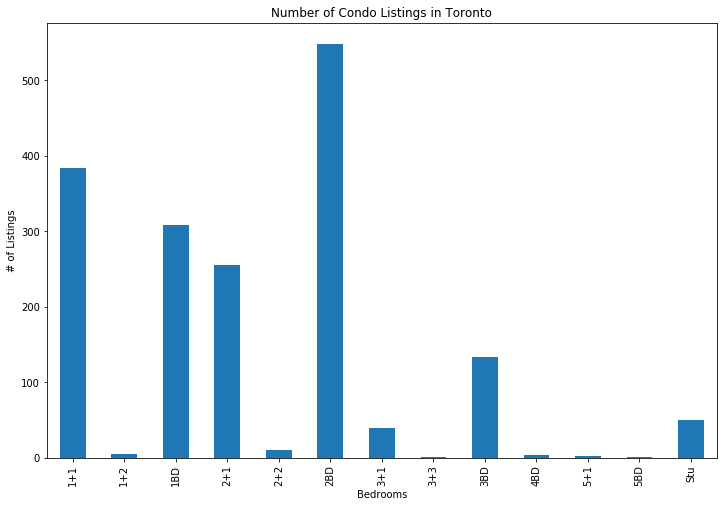

Higher number of listings may reflect a popular choice as investment properties


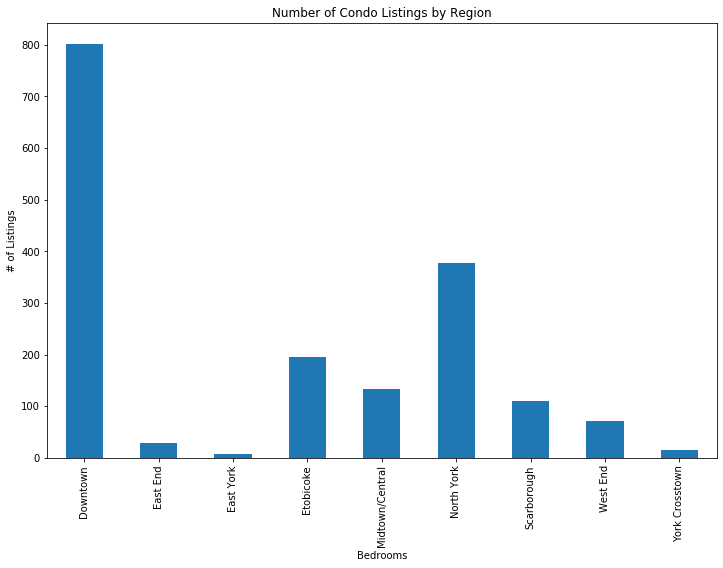

Higher number of listings in that region may reflect more investment properties or change in environment in the area


In [37]:
#Number of Condo Listings in Toronto


avg_listings = df_condos.groupby(['Bedrooms']).size()
avg_listings_region = df_condos.groupby(['Region']).size()

avg_listings.plot(kind='bar',figsize=(12,8))
plt.title('Number of Condo Listings in Toronto')
plt.xlabel('Bedrooms')
plt.ylabel('# of Listings')
plt.show()
print ('Higher number of listings may reflect a popular choice as investment properties')

avg_listings_region.plot(kind='bar',figsize=(12,8))
plt.title('Number of Condo Listings by Region')
plt.xlabel('Bedrooms')
plt.ylabel('# of Listings')
plt.show()
print ('Higher number of listings in that region may reflect more investment properties or change in environment in the area')

In [38]:
#Plot Average Price per Sq Ft by Bedroom
Avg_Prices_Grouped = df_condos[['Bedrooms','Avg Price per Sq Ft']]
c = Avg_Prices_Grouped.groupby('Bedrooms').mean()

c.plot(kind='bar',figsize=(12,8))
plt.title('Average Price per Sq Ft by Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price per Sq Ft')
plt.tight_layout()
plt.show()

print ('Most condos in Toronto now average around 1000/sq ft.')

KeyError: "['Avg Price per Sq Ft'] not in index"

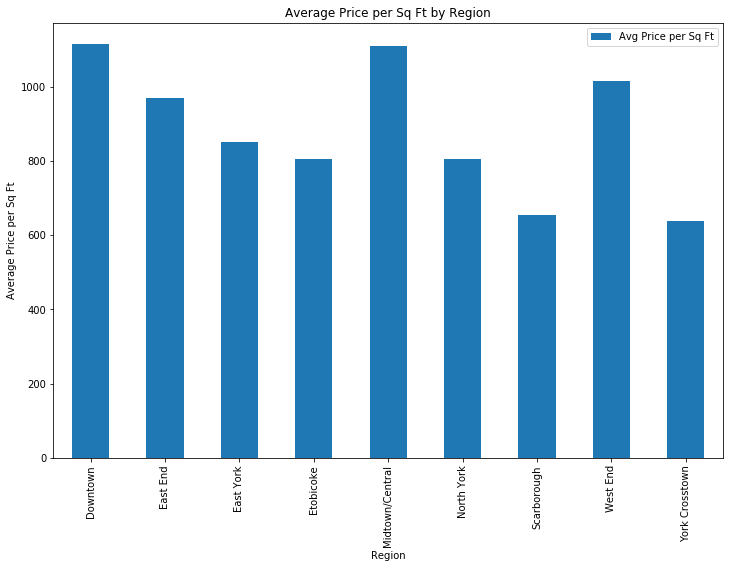

This reflects areas in Toronto where condo prices are highest


In [864]:
#Plot Average Price per Sq Ft by Region
Avg_Prices_Region = df_condos[['Region','Avg Price per Sq Ft']]
d = Avg_Prices_Region.groupby('Region').mean()

d.plot(kind='bar',figsize=(12,8))
plt.title('Average Price per Sq Ft by Region')
plt.xlabel('Region')
plt.ylabel('Average Price per Sq Ft')
plt.show()

print ('This reflects areas in Toronto where condo prices are highest')

# 5. Scrape Historical Real Estate Data

In [71]:

#Scape Downtown Condos
dt_sold_prices=[]
dt_sold_location=[]
dt_sold_sqft=[]
dt_sold_bd=[]
dt_sold_all=[]
dt_sold_date=[]
dt_sold_mtce = []

In [87]:
#Scape Sold Properties Downtown #COMPLETE


def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C201&sublocality_id=14&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        dt_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        dt_sold_location.append(tag.get_text())

    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        dt_sold_sqft.append(tag.get_text())

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        dt_sold_bd.append(bedrooms)

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        dt_sold_all.append(everything)

    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        dt_sold_date.append(everything)

    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        dt_sold_mtce.append(everything)

In [88]:
a = {'Prices':dt_sold_prices,
                         'Location':dt_sold_location,
                         'Square Ft':dt_sold_sqft,
                         'Bedrooms':dt_sold_bd,
                         'Everything':dt_sold_all,
                         'Sold Date':dt_sold_date,
                        'Maintenance Fee':dt_sold_mtce}

df_sold_condos = pd.DataFrame.from_dict(a, orient='index')
df_sold_condos = df_sold_condos.transpose()

In [89]:
df_sold_condos['Region']= 'Downtown'
df_sold_condos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Prices           858 non-null    object
 1   Location         858 non-null    object
 2   Square Ft        857 non-null    object
 3   Bedrooms         858 non-null    object
 4   Everything       858 non-null    object
 5   Sold Date        858 non-null    object
 6   Maintenance Fee  858 non-null    object
 7   Region           858 non-null    object
dtypes: object(8)
memory usage: 53.8+ KB


In [53]:
df_sold_condos.to_excel('sold.xlsx')

In [78]:
sc_sold_prices=[]
sc_sold_location=[]
sc_sold_sqft=[]
sc_sold_bd=[]
sc_sold_all=[]
sc_sold_date=[]
sc_sold_mtce=[]

In [79]:
#Scape Scarborough Condos - COMPLETE


def get_page(year,page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=15&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for year in range(2010,2021):
    for page in range(12):
        soup = get_page(year,page)
        for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
            sc_sold_prices.append(tag.get_text())

        for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
            sc_sold_location.append(tag.get_text())

        for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
            sc_sold_sqft.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            bedrooms = tag.get_text()[0:3]
            sc_sold_bd.append(bedrooms)

        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            everything = tag.get_text()[0:]
            sc_sold_all.append(everything)

        for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
            everything = tag.get_text()[0:]
            sc_sold_date.append(everything)
        
        for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
            everything = tag.get_text()[0:]
            sc_sold_mtce.append(everything)

In [80]:
b = {'Prices':sc_sold_prices,
                         'Location':sc_sold_location,
                         'Square Ft':sc_sold_sqft,
                         'Bedrooms':sc_sold_bd,
                         'Everything':sc_sold_all,
                         'Sold Date':sc_sold_date,
                         'Maintenance Fee':sc_sold_mtce}

sc_sold_condos = pd.DataFrame.from_dict(b, orient='index')
sc_sold_condos = sc_sold_condos.transpose()

sc_sold_condos['Region']= 'Scarborough'
sc_sold_condos.info() #DONE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Prices           405 non-null    object
 1   Location         405 non-null    object
 2   Square Ft        405 non-null    object
 3   Bedrooms         405 non-null    object
 4   Everything       405 non-null    object
 5   Sold Date        405 non-null    object
 6   Maintenance Fee  405 non-null    object
 7   Region           405 non-null    object
dtypes: object(8)
memory usage: 25.4+ KB


In [3]:
#Scape East End Condos
et_sold_prices=[]
et_sold_location=[]
et_sold_sqft=[]
et_sold_bd=[]
et_sold_all=[]
et_sold_date=[]
et_sold_mtce=[]

In [68]:
#Scape Sold Properties Etobicoke Last 12 Months



def get_page(page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C2020&sublocality_id=16&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

# for year in range (2010,2021):
for page in range(12):
    soup = get_page(page)
    for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
        et_sold_prices.append(tag.get_text())

    for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
        et_sold_location.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
        et_sold_sqft.append(tag.get_text())


    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        bedrooms = tag.get_text()[0:3]
        et_sold_bd.append(bedrooms)

    for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
        everything = tag.get_text()[0:]
        et_sold_all.append(everything)

    for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
        everything = tag.get_text()[0:]
        et_sold_date.append(everything)
            
    for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
        everything = tag.get_text()[0:]
        et_sold_mtce.append(everything)

In [69]:
c = {'Prices':et_sold_prices,
                         'Location':et_sold_location,
                         'Square Ft':et_sold_sqft,
                         'Bedrooms':et_sold_bd,
                         'Everything':et_sold_all,
                         'Sold Date':et_sold_date,
                          'Maintenance Fee':et_sold_mtce}

et_sold_condos = pd.DataFrame.from_dict(c, orient='index')
et_sold_condos = et_sold_condos.transpose()

In [70]:
et_sold_condos['Region']= 'Etobicoke'
et_sold_condos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574 entries, 0 to 2573
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Prices           2574 non-null   object
 1   Location         2574 non-null   object
 2   Square Ft        2573 non-null   object
 3   Bedrooms         2574 non-null   object
 4   Everything       2574 non-null   object
 5   Sold Date        2574 non-null   object
 6   Maintenance Fee  2574 non-null   object
 7   Region           2574 non-null   object
dtypes: object(8)
memory usage: 161.0+ KB


In [99]:
#Scape Sold Properties North York in Last 12 Months - DONE

#Scape north york Condos
ny_sold_prices=[]
ny_sold_location=[]
ny_sold_sqft=[]
ny_sold_bd=[]
ny_sold_all=[]
ny_sold_date=[]
ny_sold_mtce=[]

def get_page(year,page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=17&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for year in range(2010,2021):
    for page in range(12):
        soup = get_page(year,page)
        for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
            ny_sold_prices.append(tag.get_text())

        for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
            ny_sold_location.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
            ny_sold_sqft.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            bedrooms = tag.get_text()[0:3]
            ny_sold_bd.append(bedrooms)

        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            everything = tag.get_text()[0:]
            ny_sold_all.append(everything)

        for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
            everything = tag.get_text()[0:]
            ny_sold_date.append(everything)

        for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
            everything = tag.get_text()[0:]
            ny_sold_mtce.append(everything)

In [101]:
d = {'Prices':ny_sold_prices,
                         'Location':ny_sold_location,
                         'Square Ft':ny_sold_sqft,
                         'Bedrooms':ny_sold_bd,
                         'Everything':ny_sold_all,
                         'Sold Date':ny_sold_date,
                          'Maintenance Fee':ny_sold_mtce}

ny_sold_condos = pd.DataFrame.from_dict(d, orient='index')
ny_sold_condos = ny_sold_condos.transpose()

ny_sold_condos['Region']= 'North York'
ny_sold_condos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Prices           0 non-null      float64
 1   Location         0 non-null      float64
 2   Square Ft        0 non-null      float64
 3   Bedrooms         0 non-null      float64
 4   Everything       0 non-null      float64
 5   Sold Date        0 non-null      float64
 6   Maintenance Fee  0 non-null      float64
 7   Region           0 non-null      object 
dtypes: float64(7), object(1)
memory usage: 124.0+ bytes


In [33]:
#Scape Sold Properties York Crosstown in Last 12 Months - COMPLETE

#Scape York Crosstown Condos
yc_sold_prices=[]
yc_sold_location=[]
yc_sold_sqft=[]
yc_sold_bd=[]
yc_sold_all=[]
yc_sold_date=[]
yc_sold_mtce=[]

def get_page(year,page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=18&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for year in range (2010,2021):
    for page in range(7):
        soup = get_page(year,page)
        for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
            yc_sold_prices.append(tag.get_text())

        for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
            yc_sold_location.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
            yc_sold_sqft.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            bedrooms = tag.get_text()[0:3]
            yc_sold_bd.append(bedrooms)

        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            everything = tag.get_text()[0:]
            yc_sold_all.append(everything)

        for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
            everything = tag.get_text()[0:]
            yc_sold_date.append(everything)
            
        for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
            everything = tag.get_text()[0:]
            yc_sold_mtce.append(everything)

In [35]:
e = {'Prices':yc_sold_prices,
                         'Location':yc_sold_location,
                         'Square Ft':yc_sold_sqft,
                         'Bedrooms':yc_sold_bd,
                         'Everything':yc_sold_all,
                         'Sold Date':yc_sold_date,
                        'Maintenance Fee':yc_sold_mtce}

yc_sold_condos = pd.DataFrame.from_dict(e, orient='index')
yc_sold_condos = yc_sold_condos.transpose()

yc_sold_condos['Region']= 'York Crosstown'
yc_sold_condos.to_excel('yorkcrosstown.xlsx')

In [87]:
#Scape Sold Properties West End in Last 12 Months - COMPLETE

#Scape West End Condos
we_sold_prices=[]
we_sold_location=[]
we_sold_sqft=[]
we_sold_bd=[]
we_sold_all=[]
we_sold_date=[]
we_sold_mtce=[]

def get_page(year,page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=19&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for year in range (2010,2021):
    for page in range(12):
        soup = get_page(year,page)
        for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
            we_sold_prices.append(tag.get_text())

        for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
            we_sold_location.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
            we_sold_sqft.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            bedrooms = tag.get_text()[0:3]
            we_sold_bd.append(bedrooms)

        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            everything = tag.get_text()[0:]
            we_sold_all.append(everything)

        for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
            everything = tag.get_text()[0:]
            we_sold_date.append(everything)

        for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
            everything = tag.get_text()[0:]
            we_sold_mtce.append(everything)

In [88]:
f = {'Prices':we_sold_prices,
                         'Location':we_sold_location,
                         'Square Ft':we_sold_sqft,
                         'Bedrooms':we_sold_bd,
                         'Everything':we_sold_all,
                         'Sold Date':we_sold_date,
                        'Maintenance Fee':we_sold_mtce}

we_sold_condos = pd.DataFrame.from_dict(f, orient='index')
we_sold_condos = we_sold_condos.transpose()

we_sold_condos['Region']= 'West End'
we_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Maintenance Fee,Region
0,"$253,800 $268,900","100 Western Battery Rd, Unit 701",,1BD,1BD1BA0 Parking,Sold in 2010,Maint. Fee $245MLS#: C2007641,West End
1,"$250,000 $244,900","100 Western Battery Rd, Unit 813",,1BD,1BD1BA0 Parking,Sold in 2010,Maint. Fee $207MLS#: C2007916,West End
2,"$388,000 $409,000","43 Hanna Ave, Unit 313",700-899 sqft,1BD,1BD1BA1 Parking700-899 sqft,Sold in 2010,Maint. Fee $322MLS#: C1994555,West End
3,"$244,900 $244,900","100 Western Battery Rd, Unit 713",,1BD,1BD1BA0 Parking,Sold in 2010,Maint. Fee $207MLS#: C2005546,West End
4,"$320,000 $324,900","100 Western Battery Rd, Unit 202",500-699 sqft,1+1,1+1BD1BA1 Parking500-699 sqft,Sold in 2010,Maint. Fee $329MLS#: C2007081,West End
...,...,...,...,...,...,...,...,...
3337,"$900,000 $929,999",110 - 24 Noble St,600-699 sqft,1BD,1BD1BA1 Parking900-999 sqft,Sold in 2020,Maint. Fee $672MLS#: W4847285,West End
3338,"$732,000 $749,900",103 - 5 Hanna Ave,900-999 sqft,1BD,1BD2BA1 Parking700-799 sqft,Sold in 2020,Maint. Fee $497MLS#: C4870408,West End
3339,"$585,000 $539,900",307 - 1410 Dupont St,800-899 sqft,1BD,1BD1BA1 Parking600-699 sqft,Sold in 2020,Maint. Fee $388MLS#: W4879227,West End
3340,"$933,000 $939,000",1417 - 85 East Liberty St,None,2BD,2BD2BA1 Parking900-999 sqft,Sold in 2020,Maint. Fee $586MLS#: C4883226,West End


In [89]:
#Scape Sold Properties East End in Last 12 Months

#Scape East End Condos
ee_sold_prices=[]
ee_sold_location=[]
ee_sold_sqft=[]
ee_sold_bd=[]
ee_sold_all=[]
ee_sold_date=[]
ee_sold_mtce=[]

def get_page(year,page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=20&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for year in range (2010,2021):
    for page in range(12):
        soup = get_page(year,page)
        for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
            ee_sold_prices.append(tag.get_text())

        for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
            ee_sold_location.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
            ee_sold_sqft.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            bedrooms = tag.get_text()[0:3]
            ee_sold_bd.append(bedrooms)

        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            everything = tag.get_text()[0:]
            ee_sold_all.append(everything)

        for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
            everything = tag.get_text()[0:]
            ee_sold_date.append(everything)

        for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
            everything = tag.get_text()[0:]
            ee_sold_mtce.append(everything)

In [90]:
g = {'Prices':ee_sold_prices,
                         'Location':ee_sold_location,
                         'Square Ft':ee_sold_sqft,
                         'Bedrooms':ee_sold_bd,
                         'Everything':ee_sold_all,
                         'Sold Date':ee_sold_date,
                        'Maintenance Fee':ee_sold_mtce}

ee_sold_condos = pd.DataFrame.from_dict(g, orient='index')
ee_sold_condos = ee_sold_condos.transpose()

ee_sold_condos['Region']= 'East End'
ee_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Maintenance Fee,Region
0,"$297,000 $299,500","2112 Queen St E, Unit 27",,1BD,1BD1BA1 Parking,Sold in 2010,Maint. Fee $297MLS#: E1993739,East End
1,"$395,000 $398,000","1765 Queen St E, Unit 405",,2BD,2BD2BA1 Parking,Sold in 2010,Maint. Fee $505MLS#: E1994721,East End
2,"$465,000 $475,000","68 Broadview Ave, Unit 116","1,100-1,299 sqft",2BD,"2BD1BA1 Parking1,100-1,299 sqft",Sold in 2010,Maint. Fee $455MLS#: E1995143,East End
3,"$328,000 $335,000","201 Carlaw Ave, Unit 510",,1BD,1BD1BA1 Parking,Sold in 2010,Maint. Fee $209MLS#: E1990084,East End
4,"$229,000 $229,000","1733 Queen St E, Unit 316",,Stu,Studio1BA1 Parking,Sold in 2010,Maint. Fee $243MLS#: E1992072,East End
...,...,...,...,...,...,...,...,...
1538,"$650,000 $629,900",301 - 88 Colgate Ave,500-599 sqft,1BD,1BD1BA0 Parking500-599 sqft,Sold in 2020,Maint. Fee $367MLS#: E4660685,East End
1539,"$569,000 $569,000",811 - 8 Trent Ave,600-699 sqft,1+1,1+1BD1BA1 Parking600-699 sqft,Sold in 2020,Maint. Fee $356MLS#: E4644833,East End
1540,"$868,000 $799,000",804 - 90 Broadview Ave,800-899 sqft,1+1,1+1BD1BA1 Parking800-899 sqft,Sold in 2020,Maint. Fee $546MLS#: E4661306,East End
1541,"$1,675,000 $1,649,000",1002 - 1201 Dundas St E,"1,400-1,599 sqft",2+1,"2+1BD2BA1 Parking1,400-1,599 sqft",Sold in 2020,"Maint. Fee $1,000MLS#: E4637592",East End


In [91]:
#Scape Sold Properties Midtown in Last 12 Months

#Scape Midtown Condos
mt_sold_prices=[]
mt_sold_location=[]
mt_sold_sqft=[]
mt_sold_bd=[]
mt_sold_all=[]
mt_sold_date=[]
mt_sold_mtce=[]

def get_page(year,page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=21&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for year in range (2010,2021):
    for page in range(12):
        soup = get_page(year,page)
        for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
            mt_sold_prices.append(tag.get_text())

        for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
            mt_sold_location.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
            mt_sold_sqft.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            bedrooms = tag.get_text()[0:3]
            mt_sold_bd.append(bedrooms)

        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            everything = tag.get_text()[0:]
            mt_sold_all.append(everything)

        for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
            everything = tag.get_text()[0:]
            mt_sold_date.append(everything)
            
        for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
            everything = tag.get_text()[0:]
            mt_sold_mtce.append(everything)

In [92]:
h = {'Prices':mt_sold_prices,
                         'Location':mt_sold_location,
                         'Square Ft':mt_sold_sqft,
                         'Bedrooms':mt_sold_bd,
                         'Everything':mt_sold_all,
                         'Sold Date':mt_sold_date,
                        'Maintenance Fee':mt_sold_mtce}

mt_sold_condos = pd.DataFrame.from_dict(h, orient='index')
mt_sold_condos = mt_sold_condos.transpose()

mt_sold_condos['Region']= 'Midtown'
mt_sold_condos.info()

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Maintenance Fee,Region
0,"$412,000 $429,900","188 Eglinton Ave E, Unit 208","1,100-1,299 sqft",2BD,"2BD2BA1 Parking1,100-1,299 sqft",Sold in 2010,Maint. Fee $918MLS#: C1993917,Midtown
1,"$241,000 $259,000","380 Macpherson Ave, Unit 228",500-699 sqft,Stu,Studio1BA0 Parking500-699 sqft,Sold in 2010,Maint. Fee $268MLS#: C1998263,Midtown
2,"$660,000 $679,000","25 Broadway Ave, Unit 1602","1,100-1,299 sqft",2+1,"2+1BD2BA1 Parking1,100-1,299 sqft",Sold in 2010,Maint. Fee $589MLS#: C2000958,Midtown
3,"$435,000 $439,900","25 Broadway Ave, Unit 1805",700-899 sqft,1+1,1+1BD1BA1 Parking700-899 sqft,Sold in 2010,Maint. Fee $359MLS#: C2004576,Midtown
4,"$383,000 $389,000","650 Mount Pleasant Rd, Unit 306",700-899 sqft,1+1,1+1BD2BA1 Parking700-899 sqft,Sold in 2010,Maint. Fee $458MLS#: C1994290,Midtown
...,...,...,...,...,...,...,...,...
3502,"$550,000 $588,000",632 - 161 Roehampton Ave,500-599 sqft,1BD,1BD1BA0 Parking500-599 sqft,Sold in 2020,Maint. Fee $330MLS#: C4806025,Midtown
3503,"$600,000 $600,000",704 - 88 Broadway Ave,500-599 sqft,1BD,1BD1BA1 Parking500-599 sqft,Sold in 2020,Maint. Fee $560MLS#: C4825113,Midtown
3504,"$725,000 $749,900",2901 - 2191 Yonge St,800-899 sqft,1+1,1+1BD2BA1 Parking800-899 sqft,Sold in 2020,Maint. Fee $574MLS#: C4816491,Midtown
3505,"$593,000 $598,000",705 - 101 Erskine Ave,500-599 sqft,1BD,1BD1BA0 Parking500-599 sqft,Sold in 2020,Maint. Fee $277MLS#: C4790738,Midtown


In [93]:
ey_sold_prices=[]
ey_sold_location=[]
ey_sold_sqft=[]
ey_sold_bd=[]
ey_sold_all=[]
ey_sold_date=[]
ey_sold_mtce=[]

def get_page(year,page):
    url= f'https://condos.ca/toronto/condos-for-sale?size_range=300%2C999999999&property_type=Condo%20Apt%2CComm%20Element%20Condo%2CLeasehold%20Condo&mode=Sold&end_date_unix=exact%2C{year}&sublocality_id=22&page={page}'
    driver.get(url) 
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, 'lxml')
    return soup

for year in range (2010,2021):
    
    for page in range(12):
        soup = get_page(year,page)
        for tag in soup.find_all('div',class_ = 'styles___AskingPrice-sc-54qk44-4 styles___ClosePrice-sc-54qk44-5 dHPUdq hwkkXU'):
            ey_sold_prices.append(tag.get_text())


        for tag in soup.find_all('address',class_ = 'styles___Address-sc-54qk44-13 gTwVlm'):
            ey_sold_location.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___Size-sc-54qk44-8 KRKbD'):
            ey_sold_sqft.append(tag.get_text())


        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            bedrooms = tag.get_text()[0:3]
            ey_sold_bd.append(bedrooms)

        for tag in soup.find_all(class_ = 'styles___InfoHolder-sc-54qk44-7 jtFhfz'):
            everything = tag.get_text()[0:]
            ey_sold_all.append(everything)

        for tag in soup.find_all(class_ = 'styles___Banner-sc-1a2baz3-0 iWaXsf'):
            everything = tag.get_text()[0:]
            ey_sold_date.append(everything)

        for tag in soup.find_all(class_ = 'styles___MaintHolder-sc-54qk44-10 laUWhE'):
            everything = tag.get_text()[0:]
            ey_sold_mtce.append(everything)

In [94]:
j = {'Prices':ey_sold_prices,
                         'Location':ey_sold_location,
                         'Square Ft':ey_sold_sqft,
                         'Bedrooms':ey_sold_bd,
                         'Everything':ey_sold_all,
                         'Sold Date':ey_sold_date,
                        'Maintenance Fee':ey_sold_mtce}

ey_sold_condos = pd.DataFrame.from_dict(j, orient='index')
ey_sold_condos = ey_sold_condos.transpose()

ey_sold_condos['Region']= 'East York'
ey_sold_condos

,Prices,Location,Square Ft,Bedrooms,Everything,Sold Date,Maintenance Fee,Region
0,"$172,000 $178,000","4 Park Vista Dr, Unit 604",700-899 sqft,1+1,1+1BD1BA1 Parking700-899 sqft,Sold in 2010,Maint. Fee $433MLS#: E2007123,East York
1,"$212,000 $214,999","21 Overlea Blvd, PH 01",,1+1,1+1BD1BA1 Parking,Sold in 2010,Maint. Fee $457MLS#: C1946984,East York
2,"$259,000 $259,000","1048 Broadview Ave, Unit 2006",500-699 sqft,1BD,1BD1BA1 Parking500-699 sqft,Sold in 2010,Maint. Fee $265MLS#: E2000915,East York
3,"$345,000 $349,900","356 Mcrae Dr, Unit 108",700-899 sqft,1+1,1+1BD1BA1 Parking700-899 sqft,Sold in 2010,Maint. Fee $519MLS#: C1994949,East York
4,"$179,000 $182,900","11 Thorncliffe Park Dr, PH 17",,1BD,1BD1BA1 Parking,Sold in 2010,Maint. Fee $369MLS#: C1988067,East York
...,...,...,...,...,...,...,...,...
1254,"$740,000 $755,000",1113 - 160 Vanderhoof Ave,900-999 sqft,2BD,2BD2BA1 Parking900-999 sqft,Sold in 2020,Maint. Fee $633MLS#: C4607583,East York
1255,"$349,500 $349,900",1819 - 1 Massey Sq,700-799 sqft,1+1,1+1BD1BA1 Parking700-799 sqft,Sold in 2020,Maint. Fee $556MLS#: E4670511,East York
1256,"$390,000 $399,000",1706 - 3 Massey Sq,"1,000-1,199 sqft",2+1,"2+1BD1BA1 Parking1,000-1,199 sqft",Sold in 2020,Maint. Fee $820MLS#: E4656939,East York
1257,"$351,000 $299,999",1018 - 1 Massey Sq,700-799 sqft,1BD,1BD1BA1 Parking700-799 sqft,Sold in 2020,Maint. Fee $546MLS#: E4653825,East York


# 6. Combine the Sold Listings Together

In [176]:
frames2 = [df_sold_condos, sc_sold_condos,
et_sold_condos,ny_sold_condos,yc_sold_condos,we_sold_condos,ee_sold_condos, 
mt_sold_condos, ey_sold_condos]

df_condos_sold = pd.concat(frames2,axis=0,sort=True)
print(df_condos_sold.head())


  Bedrooms                   Everything                         Location  \
0      1BD  1BD1BA0 Parking500-699 sqft      155 Dalhousie St, Unit 1006   
1      1BD  1BD1BA0 Parking500-699 sqft  637 Lake Shore Blvd W, Unit 525   
2      1BD              1BD1BA1 Parking    231 Fort York Blvd, Unit 2305   
3      1BD  1BD1BA0 Parking500-699 sqft      208 Queens Quay W, Unit 608   
4      2BD              2BD2BA1 Parking           99 Avenue Rd, Unit 306   

                 Maintenance Fee              Prices    Region     Sold Date  \
0  Maint. Fee $317MLS#: C1997640  $310,000  $319,900  Downtown  Sold in 2010   
1  Maint. Fee $307MLS#: C1998571  $295,000  $299,900  Downtown  Sold in 2010   
2  Maint. Fee $289MLS#: C2005190  $282,000  $285,900  Downtown  Sold in 2010   
3  Maint. Fee $305MLS#: C2000683  $321,000  $312,000  Downtown  Sold in 2010   
4  Maint. Fee $783MLS#: C2002484  $536,000  $550,000  Downtown  Sold in 2010   

      Square Ft  
0  500-699 sqft  
1  500-699 sqft  
2       

In [177]:
df_condos_sold.to_excel('df_condos_sold.xlsx')

In [181]:
#To clean up the Everything Column in order to pull out the number of Parking
df_condos_sold[['A','B']] = df_condos_sold['Everything'].str.split(' ',1, expand=True)
df_condos_sold['Parking'] = df_condos_sold['A'].str.strip().str[-1]
df_condos_sold = df_condos_sold.drop(columns = ['A','B'])

In [182]:
df_condos_sold['Prices'] = df_condos_sold['Prices'].str.replace('$','')
df_condos_sold['Prices'] = df_condos_sold['Prices'].str.replace(',','')
df_condos_sold[['Listed Price','Sold Price']] = df_condos_sold['Prices'].str.split(' ',1,expand=True)

In [183]:
df_condos_sold

,Bedrooms,Everything,Location,Maintenance Fee,Prices,Region,Sold Date,Square Ft,Parking,Listed Price,Sold Price
0,1BD,1BD1BA0 Parking500-699 sqft,"155 Dalhousie St, Unit 1006",Maint. Fee $317MLS#: C1997640,310000 319900,Downtown,Sold in 2010,500-699 sqft,0,310000,319900
1,1BD,1BD1BA0 Parking500-699 sqft,"637 Lake Shore Blvd W, Unit 525",Maint. Fee $307MLS#: C1998571,295000 299900,Downtown,Sold in 2010,500-699 sqft,0,295000,299900
2,1BD,1BD1BA1 Parking,"231 Fort York Blvd, Unit 2305",Maint. Fee $289MLS#: C2005190,282000 285900,Downtown,Sold in 2010,,1,282000,285900
3,1BD,1BD1BA0 Parking500-699 sqft,"208 Queens Quay W, Unit 608",Maint. Fee $305MLS#: C2000683,321000 312000,Downtown,Sold in 2010,500-699 sqft,0,321000,312000
4,2BD,2BD2BA1 Parking,"99 Avenue Rd, Unit 306",Maint. Fee $783MLS#: C2002484,536000 550000,Downtown,Sold in 2010,,1,536000,550000
...,...,...,...,...,...,...,...,...,...,...,...
1254,2BD,2BD2BA1 Parking900-999 sqft,1113 - 160 Vanderhoof Ave,Maint. Fee $633MLS#: C4607583,740000 755000,East York,Sold in 2020,900-999 sqft,1,740000,755000
1255,1+1,1+1BD1BA1 Parking700-799 sqft,1819 - 1 Massey Sq,Maint. Fee $556MLS#: E4670511,349500 349900,East York,Sold in 2020,700-799 sqft,1,349500,349900
1256,2+1,"2+1BD1BA1 Parking1,000-1,199 sqft",1706 - 3 Massey Sq,Maint. Fee $820MLS#: E4656939,390000 399000,East York,Sold in 2020,"1,000-1,199 sqft",1,390000,399000
1257,1BD,1BD1BA1 Parking700-799 sqft,1018 - 1 Massey Sq,Maint. Fee $546MLS#: E4653825,351000 299999,East York,Sold in 2020,700-799 sqft,1,351000,299999


In [184]:
#To clean up the sq ft column
df_condos_sold['Square Ft'] = df_condos_sold['Square Ft'].str.replace('sqft','')

#Remove the dash and split the min and max into two columns.
df_condos_sold[['Min Sq Ft','Max Sq Ft']] = df_condos_sold['Square Ft'].str.split('-',1, expand=True)

#Clean up the Min Sq Ft column
df_condos_sold['Min Sq Ft'] = df_condos_sold['Min Sq Ft'].str.replace(',','')

#Clean up the commas in the Max column
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].str.replace(',','')

In [185]:
#Replace any blanks with nan in the Min Sq Ft Column
df_condos_sold['Min Sq Ft'].replace('',np.nan,inplace=True)

In [186]:
#Replace any blanks with nan in the Max Sq Ft Column
df_condos_sold['Max Sq Ft'].replace('',np.nan,inplace=True)

In [187]:
#Replace any Min and Max Sq Ft.values that are 0, with Min or Max Sq Ft Values.
df_condos_sold['Min Sq Ft'] = df_condos_sold['Min Sq Ft'].mask(df_condos_sold['Min Sq Ft']==0).fillna(df_condos_sold['Max Sq Ft'])
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].mask(df_condos_sold['Max Sq Ft']==0).fillna(df_condos_sold['Min Sq Ft'])

In [188]:
#Drop any remaining nulls
df_condos_sold.dropna(subset = ['Max Sq Ft'],inplace=True)

In [189]:
#Initialize a new column to calculate Average Square Feet. 
#This column will be used to average the min/max square feet.
df_condos_sold['Avg Sq Ft'] = 0

In [190]:
#Convert columns to integers so they can be calculated later
df_condos_sold['Sold Price'] = df_condos_sold['Sold Price'].astype(int)

In [191]:
#Convert columns to integers so they can be calculated later
df_condos_sold['Min Sq Ft'] = df_condos_sold['Min Sq Ft'].astype(int)

In [192]:
#Convert columns to integers so they can be calculated later
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].astype(int)

In [193]:
#Replace any Min and Max Sq Ft.values that are 0, with Min or Max Sq Ft Values.
df_condos_sold['Min Sq Ft'] = df_condos_sold['Min Sq Ft'].mask(df_condos_sold['Min Sq Ft']==0).fillna(df_condos_sold['Max Sq Ft'])
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].mask(df_condos_sold['Max Sq Ft']==0).fillna(df_condos_sold['Min Sq Ft'])

In [194]:
#Fix the Max Sq Ft Error. There is a typo in one of the dataset fields
df_condos_sold['Max Sq Ft'] = df_condos_sold['Max Sq Ft'].replace({65535:5000})

In [195]:
#Take the avg Sq ft per unit
df_condos_sold['Avg Sq Ft'] = (df_condos_sold['Min Sq Ft'] + df_condos_sold['Max Sq Ft'])/2

In [196]:
#Calculate the Avg Price per Square Ft
df_condos_sold['Avg Price per Sq Ft'] = 0
df_condos_sold['Avg Price per Sq Ft'] = df_condos_sold['Sold Price']/df_condos_sold['Avg Sq Ft']

In [197]:
#From web scraping, there are some text fields in the Sold Dates. Remove these text values.
df_condos_sold['Sold Date'] = df_condos_sold['Sold Date'].str.replace('Sold in','')

In [198]:
#From web scraping, there are some text fields in the Sold Dates. Remove these text values.
df_condos_sold['Sold Date'] = df_condos_sold['Sold Date'].str.replace('Sold Conditional in','')

In [199]:
df_condos_sold[['A','B']] = df_condos_sold['Maintenance Fee'].str.split(' ',1, expand=True)
df_condos_sold[['C','D']] = df_condos_sold['B'].str.split(' ',1,expand=True)
df_condos_sold[['E','F']] = df_condos_sold['D'].str.split('M',1,expand=True)
df_condos_sold = df_condos_sold.drop(columns = ['A','B','C','D','F','Maintenance Fee'])
df_condos_sold['Maintenance Fee'] = df_condos_sold['E']

In [200]:
df_condos_sold[['C','D']] = df_condos_sold['Maintenance Fee'].str.split('$',1,expand=True)
df_condos_sold = df_condos_sold.drop(columns = ['E','C','Maintenance Fee'])
df_condos_sold = df_condos_sold.rename(columns={'D':'Maintenance Fee'})

In [201]:
df_condos_sold

,Bedrooms,Everything,Location,Prices,Region,Sold Date,Square Ft,Parking,Listed Price,Sold Price,Min Sq Ft,Max Sq Ft,Avg Sq Ft,Avg Price per Sq Ft,Maintenance Fee
0,1BD,1BD1BA0 Parking500-699 sqft,"155 Dalhousie St, Unit 1006",310000 319900,Downtown,2010,500-699,0,310000,319900,500.0,699,599.5,533.611343,317
1,1BD,1BD1BA0 Parking500-699 sqft,"637 Lake Shore Blvd W, Unit 525",295000 299900,Downtown,2010,500-699,0,295000,299900,500.0,699,599.5,500.250209,307
3,1BD,1BD1BA0 Parking500-699 sqft,"208 Queens Quay W, Unit 608",321000 312000,Downtown,2010,500-699,0,321000,312000,500.0,699,599.5,520.433695,305
5,2BD,"2BD2BA1 Parking900-1,099 sqft","438 King St W, Unit 711",510000 529800,Downtown,2010,"900-1,099",1,510000,529800,900.0,1099,999.5,530.065033,579
6,2BD,2BD2BA1 Parking700-899 sqft,"65 Bremner Blvd, Unit 1702",435000 444900,Downtown,2010,700-899,1,435000,444900,700.0,899,799.5,556.472795,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2BD,2BD2BA1 Parking900-999 sqft,1113 - 160 Vanderhoof Ave,740000 755000,East York,2020,900-999,1,740000,755000,900.0,999,949.5,795.155345,633
1255,1+1,1+1BD1BA1 Parking700-799 sqft,1819 - 1 Massey Sq,349500 349900,East York,2020,700-799,1,349500,349900,700.0,799,749.5,466.844563,556
1256,2+1,"2+1BD1BA1 Parking1,000-1,199 sqft",1706 - 3 Massey Sq,390000 399000,East York,2020,"1,000-1,199",1,390000,399000,1000.0,1199,1099.5,362.892224,820
1257,1BD,1BD1BA1 Parking700-799 sqft,1018 - 1 Massey Sq,351000 299999,East York,2020,700-799,1,351000,299999,700.0,799,749.5,400.265510,546


In [220]:
#In order to merge the current lists dataframe, with the sold listings, create identical columns to merge.
df_condos['Listed Price'] = df_condos['Prices']
df_condos['Sold Price'] = df_condos['Prices']

In [221]:
#Tag all current listings at a current listing, so when merged, we can identify this dataset again
df_condos['Sold Date'] = 'Current Listing 2021'

In [222]:
df_condos[['C','D']] = df_condos['Maintenance Fee'].str.split('$',1,expand=True)
df_condos = df_condos.drop(columns = ['C','Maintenance Fee'])
df_condos = df_condos.rename(columns={'D':'Maintenance Fee'})
df_condos = df_condos.drop(columns = ['E'])


In [225]:
df_condos

,Bedrooms,Everything,Location,Prices,Region,Square Ft,Parking,Min Sq Ft,Max Sq Ft,Avg Sq Ft,Listed Price,Sold Price,Sold Date,Maintenance Fee
0,1BD,1BD1BA1 Parking593 sqft,1109 - 65 Bremner Boulevard,749900,Downtown,593,1,593.0,593.0,0,749900,749900,Current Listing 2021,641
1,2BD,2BD2BA1 Parking900-999 sqft,707 - 8 Wellesley St E,799500,Downtown,900-999,1,900.0,999.0,0,799500,799500,Current Listing 2021,"1,006"
2,3BD,3BD2BA1 Parking800-899 sqft,2008 - 120 Parliament St,968000,Downtown,800-899,1,800.0,899.0,0,968000,968000,Current Listing 2021,636
3,1+1,1+1BD2BA0 Parking600-699 sqft,2802 - 17 Bathurst St,795000,Downtown,600-699,0,600.0,699.0,0,795000,795000,Current Listing 2021,376
4,1+1,1+1BD1BA1 Parking600-699 sqft,1106 - 17 Bathurst St,838000,Downtown,600-699,1,600.0,699.0,0,838000,838000,Current Listing 2021,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2BD,2BD1BA1 Parking700-799 sqft,511 - 21 Overlea Blvd,539000,East York,700-799,1,700.0,799.0,0,539000,539000,Current Listing 2021,734
6,3BD,"3BD3BA1 Parking1,400-1,599 sqft",202 - 3 Southvale Dr,1717200,East York,"1,400-1,599",1,1400.0,1599.0,0,1717200,1717200,Current Listing 2021,"1,131"
7,2BD,"2BD2BA1 Parking1,000-1,199 sqft",604 - 3 Southvale Dr,1394800,East York,"1,000-1,199",1,1000.0,1199.0,0,1394800,1394800,Current Listing 2021,899
8,3BD,"3BD2BA1 Parking1,400-1,599 sqft",PH02 - 3 Southvale Dr,1804000,East York,"1,400-1,599",1,1400.0,1599.0,0,1804000,1804000,Current Listing 2021,"1,102"


In [226]:
#append the two dataframes
df_combined = df_condos_sold.append(df_condos)

In [227]:
drop_values = df_combined[df_combined['Bedrooms'] == 'Con'].index
df_combined.drop(drop_values,inplace=True)

In [228]:
df_combined

,Bedrooms,Everything,Location,Prices,Region,Sold Date,Square Ft,Parking,Listed Price,Sold Price,Min Sq Ft,Max Sq Ft,Avg Sq Ft,Avg Price per Sq Ft,Maintenance Fee
0,1BD,1BD1BA0 Parking500-699 sqft,"155 Dalhousie St, Unit 1006",310000 319900,Downtown,2010,500-699,0,310000,319900,500.0,699.0,599.5,533.611343,317
1,1BD,1BD1BA0 Parking500-699 sqft,"637 Lake Shore Blvd W, Unit 525",295000 299900,Downtown,2010,500-699,0,295000,299900,500.0,699.0,599.5,500.250209,307
3,1BD,1BD1BA0 Parking500-699 sqft,"208 Queens Quay W, Unit 608",321000 312000,Downtown,2010,500-699,0,321000,312000,500.0,699.0,599.5,520.433695,305
5,2BD,"2BD2BA1 Parking900-1,099 sqft","438 King St W, Unit 711",510000 529800,Downtown,2010,"900-1,099",1,510000,529800,900.0,1099.0,999.5,530.065033,579
6,2BD,2BD2BA1 Parking700-899 sqft,"65 Bremner Blvd, Unit 1702",435000 444900,Downtown,2010,700-899,1,435000,444900,700.0,899.0,799.5,556.472795,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2BD,2BD1BA1 Parking700-799 sqft,511 - 21 Overlea Blvd,539000,East York,Current Listing 2021,700-799,1,539000,539000,700.0,799.0,0.0,NaN,734
6,3BD,"3BD3BA1 Parking1,400-1,599 sqft",202 - 3 Southvale Dr,1717200,East York,Current Listing 2021,"1,400-1,599",1,1717200,1717200,1400.0,1599.0,0.0,NaN,"1,131"
7,2BD,"2BD2BA1 Parking1,000-1,199 sqft",604 - 3 Southvale Dr,1394800,East York,Current Listing 2021,"1,000-1,199",1,1394800,1394800,1000.0,1199.0,0.0,NaN,899
8,3BD,"3BD2BA1 Parking1,400-1,599 sqft",PH02 - 3 Southvale Dr,1804000,East York,Current Listing 2021,"1,400-1,599",1,1804000,1804000,1400.0,1599.0,0.0,NaN,"1,102"


In [229]:
#Save the dataset as csv because this took forever to scrape
df_combined.to_csv('df_combined.csv')

# 7. Exploratory Data Analysis on Sold Listings

In [804]:
#Explore the sold listings to see how Avg Price per Sq Ft grew over time
Avg_Price_Year_Grouped = Avg_Price_Year.groupby('Sold Date').mean()
Avg_Price_Year_Grouped.reset_index()
Avg_Price_Year_Grouped['Annual Return'] = 0
Avg_Price_Year_Grouped['Annual Return'] = (Avg_Price_Year_Grouped['Avg Price per Sq Ft']/Avg_Price_Year_Grouped['Avg Price per Sq Ft'].shift(1)) - 1

Avg_Price_Year_Grouped.reset_index()

,Sold Date,Avg Price per Sq Ft,Annual Return
0,2011,398.572434,NaN
1,2012,399.542043,0.002433
2,2013,414.166434,0.036603
3,2014,437.486540,0.056306
4,2015,449.410650,0.027256
5,2016,519.456688,0.155862
6,2017,604.143398,0.163029
7,2018,708.996214,0.173556
8,2019,709.099169,0.000145
9,2020,835.510029,0.178270


In [ ]:
#Calculate the annualized rate of return
Avg_Price_Year_Grouped.dropna(inplace=True)
Avg_Price_Year_Grouped.reset_index()
Avg_Price_Year_Grouped['Returns']  = 1+Avg_Price_Year_Grouped['Annual Return']
Annualized_Return = round(((Avg_Price_Year_Grouped['Returns'].prod()**(1/len(Avg_Price_Year_Grouped['Annual Return']))-1)*100),1)
length_year = str(len(Avg_Price_Year_Grouped['Annual Return']))

print ('This reflects an annualized return of ' + str(Annualized_Return) + '% over ' + str(length_year) + ' years')

In [850]:
#Load the SP500 Data.
df_SP = pd.read_excel('SP500Historical.xlsx')
df_SP

,Year,Closing Price
0,2011,1286.12
1,2012,1312.41
2,2013,1498.11
3,2014,1782.59
4,2015,1994.99
5,2016,1940.24
6,2017,2278.87
7,2018,2823.81
8,2019,2704.10
9,2020,3225.52


In [851]:
#Calculate the Annual returns for SP500
df_SP['Annual Return'] = 0
df_SP['Annual Return'] = (df_SP['Closing Price']/df_SP['Closing Price'].shift(1)) - 1
df_SP.dropna(inplace=True)

In [ ]:
#Calculate the annualized return for SP500
df_SP['Returns'] = 1+df_SP['Annual Return']
Annualized_Return2 = round(((df_SP['Returns'].prod()**(1/len(df_SP['Annual Return']))-1)*100),1)
length_year2 = str(len(df_SP['Annual Return']))
print ('This reflects an annualized return of ' + str(Annualized_Return2) + '% over ' + str(length_year2) + ' years')

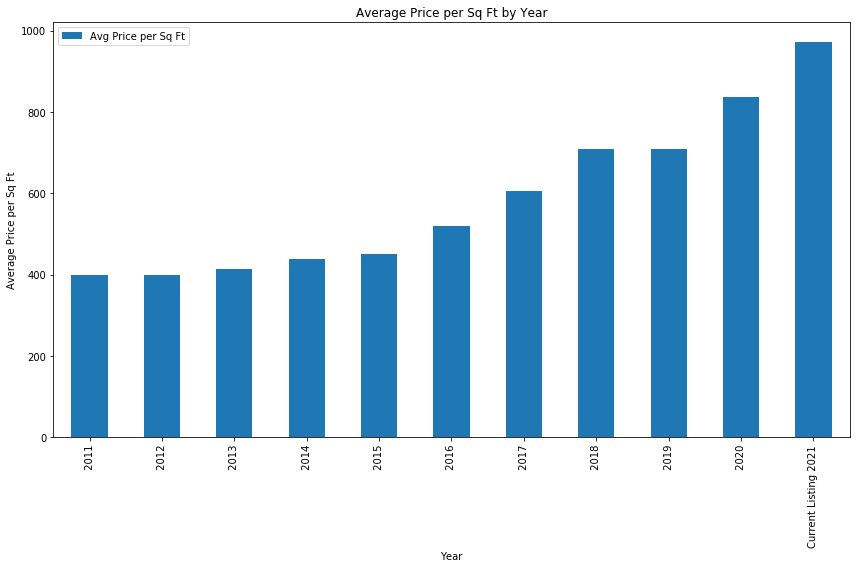

This reflects an annualized return of 9.3% over 10 years


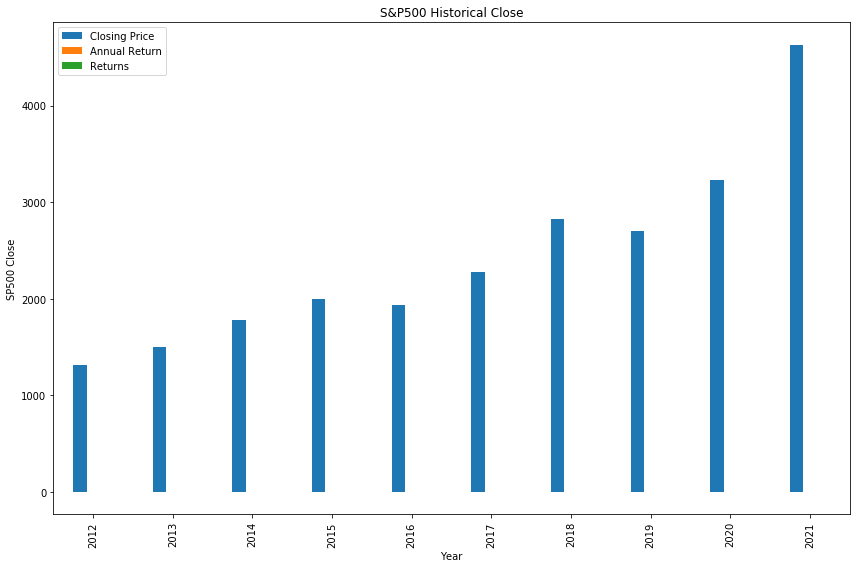

This reflects an annualized return of 13.7% over 10 years


In [866]:
#Plot the Condo Market Growth
Avg_Price_Year = df_combined[['Sold Date','Avg Price per Sq Ft']]
Avg_Price_Year_Grouped = Avg_Price_Year.groupby('Sold Date').mean()

y = Avg_Price_Year_Grouped.plot(kind='bar',figsize=(12,8))
plt.title('Average Price per Sq Ft by Year')
plt.xlabel('Year')
plt.ylabel('Average Price per Sq Ft')
plt.tight_layout()

plt.show()

print ('This reflects an annualized return of ' + str(Annualized_Return) + '% over ' + str(length_year) + ' years')

#Plot the SP500 Growth
SP_Price_Grouped = df_SP.groupby('Year').mean()

SP_Price_Grouped.plot(kind='bar',figsize=(12,8))
plt.title('S&P500 Historical Close')
plt.xlabel('Year')
plt.ylabel('SP500 Close')
plt.tight_layout()
plt.show()
print ('This reflects an annualized return of ' + str(Annualized_Return2) + '% over ' + str(length_year2) + ' years')